<a href="https://colab.research.google.com/github/debanjan02/monkey_species/blob/master/monkey_species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
from sklearn.cluster import KMeans, estimate_bandwidth, MeanShift
from glob import glob
import cv2
import fnmatch

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
x = np.load('/content/drive/My Drive/10_monkey_species/x_train.npy')
y = np.load('/content/drive/My Drive/10_monkey_species/y_train.npy')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101)
y_train = to_categorical(y_train, num_classes = 10)
y_valid = to_categorical(y_valid, num_classes = 10)

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
input_tensor = Input(shape=(299,299,3))
base_model = VGG16(input_tensor = input_tensor, include_top = False, pooling = 'average')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(10, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 299, 299, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 299, 299, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 299, 299, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 149, 149, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 149, 149, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 149, 149, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 74, 74, 128)       0         
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

In [0]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, epochs=100, validation_data=(x_valid, y_valid))

Epoch 1/100
28/27 [==============================] - 70s 2s/step - loss: 2.4393 - acc: 0.1146 - val_loss: 10.2640 - val_acc: 0.1182
Epoch 2/100
28/27 [==============================] - 47s 2s/step - loss: 2.3016 - acc: 0.0956 - val_loss: 2.7841 - val_acc: 0.0955
Epoch 3/100
28/27 [==============================] - 48s 2s/step - loss: 2.2645 - acc: 0.1265 - val_loss: 2.4051 - val_acc: 0.0864
Epoch 4/100
28/27 [==============================] - 48s 2s/step - loss: 2.1800 - acc: 0.1790 - val_loss: 12.8663 - val_acc: 0.0955
Epoch 5/100
28/27 [==============================] - 48s 2s/step - loss: 2.0934 - acc: 0.1935 - val_loss: 12.3626 - val_acc: 0.0955
Epoch 6/100
28/27 [==============================] - 48s 2s/step - loss: 2.0747 - acc: 0.2084 - val_loss: 12.3525 - val_acc: 0.0955
Epoch 7/100
28/27 [==============================] - 48s 2s/step - loss: 2.0149 - acc: 0.2625 - val_loss: 12.0201 - val_acc: 0.0955
Epoch 8/100
28/27 [==============================] - 48s 2s/step - loss: 2.004

KeyboardInterrupt: ignored

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
input_tensor = Input(shape=(299,299,3))
base_model = ResNet50(input_tensor = input_tensor, include_top = False, pooling = 'average')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(10, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 150, 150, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
from keras.callbacks import ModelCheckpoint
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/10_monkey_species/model_check_path_monkey_resnet50.hdf5',monitor="val_acc", save_best_only=True, save_weights_only=False)
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 150, verbose=1,  validation_data=(x_valid, y_valid), callbacks=[mcp])

Train on 876 samples, validate on 220 samples
Epoch 1/150
876/876 [==============================] - 48s 55ms/step - loss: 0.3114 - acc: 0.9064 - val_loss: 5.9843 - val_acc: 0.3000
Epoch 2/150
876/876 [==============================] - 46s 52ms/step - loss: 0.1707 - acc: 0.9486 - val_loss: 1.9831 - val_acc: 0.6909
Epoch 3/150
876/876 [==============================] - 46s 53ms/step - loss: 0.1152 - acc: 0.9612 - val_loss: 0.9869 - val_acc: 0.7909
Epoch 4/150
876/876 [==============================] - 46s 52ms/step - loss: 0.2254 - acc: 0.9326 - val_loss: 4.3503 - val_acc: 0.3864
Epoch 5/150
876/876 [==============================] - 46s 52ms/step - loss: 0.1764 - acc: 0.9418 - val_loss: 2.4562 - val_acc: 0.5818
Epoch 6/150
876/876 [==============================] - 46s 52ms/step - loss: 0.2414 - acc: 0.9167 - val_loss: 7.0325 - val_acc: 0.4000
Epoch 7/150
876/876 [==============================] - 46s 52ms/step - loss: 0.1816 - acc: 0.9418 - val_loss: 1.7407 - val_acc: 0.5818
Epoch 8/1

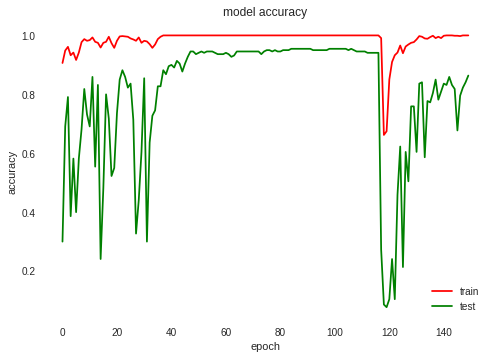

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

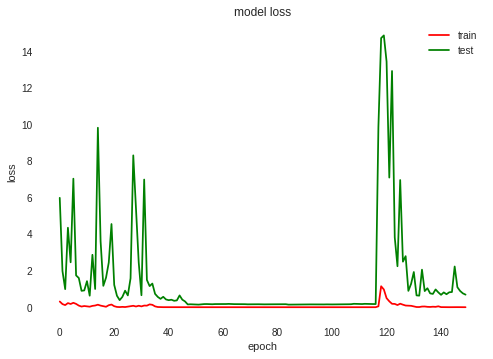

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
model.load_weights('/content/drive/My Drive/10_monkey_species/model_check_path_monkey_resnet50.hdf5')

In [0]:
del x , y

In [0]:
x_test = np.load('/content/drive/My Drive/10_monkey_species/x_test.npy')
y_test = np.load('/content/drive/My Drive/10_monkey_species/y_test.npy')

In [0]:
y_test = to_categorical(y_test, num_classes = 10)

In [0]:
from sklearn.metrics import classification_report
pred = model.predict(x_test)
print(classification_report(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        27
           3       0.97      0.97      0.97        30
           4       0.93      0.96      0.94        26
           5       1.00      0.86      0.92        28
           6       1.00      0.96      0.98        26
           7       1.00      0.93      0.96        28
           8       1.00      1.00      1.00        27
           9       0.96      0.92      0.94        26

   micro avg       0.96      0.96      0.96       272
   macro avg       0.96      0.96      0.96       272
weighted avg       0.96      0.96      0.96       272



In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.grid(b=False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

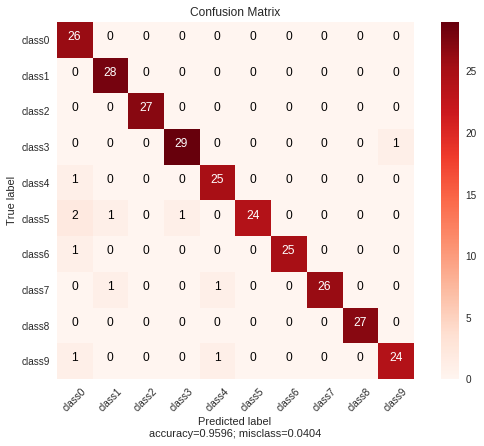

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['class0','class1','class2','class3','class4','class5','class6','class7','class8','class9'],
                      title        = "Confusion Matrix")

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
input_tensor = Input(shape=(299,299,3))
base_model = InceptionV3(input_tensor = input_tensor, include_top = False, pooling = 'average')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(10, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

87916544/87910968 [==============================] - 36s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_148 (Activation)     (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
___________________________________________

In [0]:
from keras.callbacks import ModelCheckpoint
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/10_monkey_species/model_check_path_monkey_inception_v3.hdf5',monitor="val_acc", save_best_only=True, save_weights_only=False)
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 100, verbose=1,  validation_data=(x_valid, y_valid), callbacks=[mcp])

Train on 876 samples, validate on 220 samples
Epoch 1/100
876/876 [==============================] - 70s 80ms/step - loss: 0.9937 - acc: 0.7158 - val_loss: 2.9162 - val_acc: 0.4864
Epoch 2/100
876/876 [==============================] - 34s 39ms/step - loss: 0.5120 - acc: 0.8619 - val_loss: 5.4880 - val_acc: 0.1591
Epoch 3/100
876/876 [==============================] - 34s 39ms/step - loss: 0.4218 - acc: 0.8824 - val_loss: 2.3573 - val_acc: 0.3318
Epoch 4/100
876/876 [==============================] - 34s 39ms/step - loss: 0.2747 - acc: 0.9189 - val_loss: 8.7315 - val_acc: 0.1955
Epoch 5/100
876/876 [==============================] - 34s 39ms/step - loss: 0.3836 - acc: 0.8916 - val_loss: 5.5008 - val_acc: 0.3682
Epoch 6/100
876/876 [==============================] - 34s 39ms/step - loss: 0.3325 - acc: 0.8984 - val_loss: 5.1349 - val_acc: 0.3227
Epoch 7/100
876/876 [==============================] - 34s 39ms/step - loss: 0.1669 - acc: 0.9543 - val_loss: 1.8478 - val_acc: 0.7091
Epoch 8/1

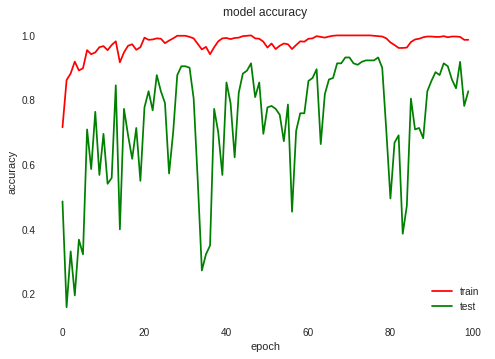

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

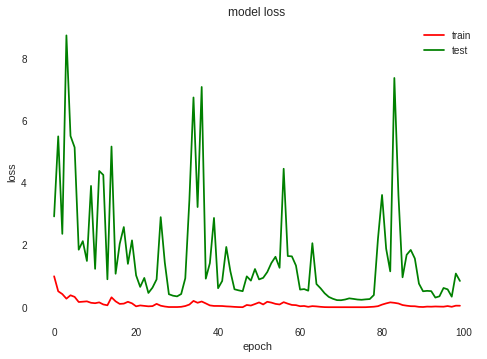

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
model.load_weights('/content/drive/My Drive/10_monkey_species/model_check_path_monkey_inception_v3.hdf5')

In [0]:
from sklearn.metrics import classification_report
pred = model.predict(x_test)
print(classification_report(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       0.90      0.96      0.93        28
           2       1.00      0.96      0.98        27
           3       1.00      0.90      0.95        30
           4       0.81      0.96      0.88        26
           5       1.00      0.86      0.92        28
           6       0.96      0.96      0.96        26
           7       0.96      0.93      0.95        28
           8       1.00      1.00      1.00        27
           9       1.00      0.92      0.96        26

   micro avg       0.94      0.94      0.94       272
   macro avg       0.95      0.95      0.95       272
weighted avg       0.95      0.94      0.95       272



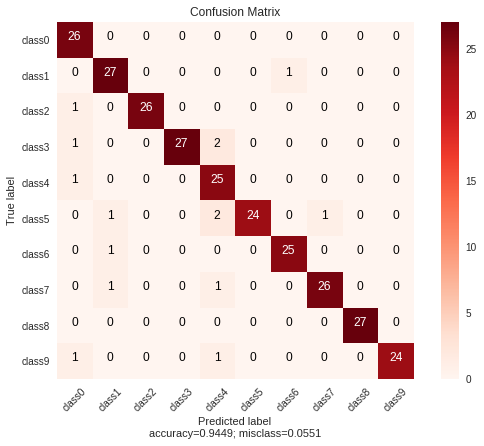

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['class0','class1','class2','class3','class4','class5','class6','class7','class8','class9'],
                      title        = "Confusion Matrix")

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
input_tensor = Input(shape=(299,299,3))
base_model =InceptionResNetV2(input_tensor = input_tensor, include_top = False, pooling = 'average',weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(10, activation = 'softmax')(x)
for layer in base_model.layers:
  layer.trainable = False
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

219062272/219055592 [==============================] - 3s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 149, 149, 32) 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 149, 149, 32) 0           batch_normalization_204[0][0]    
__________________________________________

In [0]:
from keras.callbacks import ModelCheckpoint
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/10_monkey_species/model_check_path_monkey_inception_resnet_v2.hdf5',monitor="val_acc", save_best_only=True, save_weights_only=False)
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 100, verbose=1,  validation_data=(x_valid, y_valid), callbacks=[mcp])

Train on 876 samples, validate on 220 samples
Epoch 1/100
876/876 [==============================] - 49s 56ms/step - loss: 1.2349 - acc: 0.6644 - val_loss: 14.4138 - val_acc: 0.1000
Epoch 2/100
876/876 [==============================] - 28s 31ms/step - loss: 0.3237 - acc: 0.9064 - val_loss: 14.2865 - val_acc: 0.1136
Epoch 3/100
876/876 [==============================] - 27s 31ms/step - loss: 0.2207 - acc: 0.9384 - val_loss: 14.5795 - val_acc: 0.0955
Epoch 4/100
876/876 [==============================] - 27s 31ms/step - loss: 0.1803 - acc: 0.9498 - val_loss: 14.5795 - val_acc: 0.0955
Epoch 5/100
876/876 [==============================] - 27s 31ms/step - loss: 0.1780 - acc: 0.9429 - val_loss: 14.2767 - val_acc: 0.1000
Epoch 6/100
876/876 [==============================] - 27s 31ms/step - loss: 0.0908 - acc: 0.9806 - val_loss: 14.5795 - val_acc: 0.0955
Epoch 7/100
876/876 [==============================] - 27s 31ms/step - loss: 0.0997 - acc: 0.9715 - val_loss: 14.5795 - val_acc: 0.0955
Ep

KeyboardInterrupt: ignored

In [0]:
del x, y

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
input_tensor = Input(shape=(299,299,3))
base_model =InceptionResNetV2(input_tensor = input_tensor, include_top = False, pooling = 'average',weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(10, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_505 (Conv2D)             (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_505 (BatchN (None, 149, 149, 32) 96          conv2d_505[0][0]                 
__________________________________________________________________________________________________
activation_504 (Activation)     (None, 149, 149, 32) 0           batch_normalization_505[0][0]    
__________________________________________________________________________________________________
conv2d_506

In [0]:
from keras.callbacks import ModelCheckpoint
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/10_monkey_species/model_check_path_monkey_inception_resnet_v2.hdf5',monitor="val_acc", save_best_only=True, save_weights_only=False)
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 100, verbose=1,  validation_data=(x_valid, y_valid), callbacks=[mcp])

Train on 876 samples, validate on 220 samples
Epoch 1/100
876/876 [==============================] - 149s 170ms/step - loss: 1.1052 - acc: 0.6861 - val_loss: 8.5799 - val_acc: 0.3455
Epoch 2/100
876/876 [==============================] - 84s 96ms/step - loss: 0.6820 - acc: 0.8014 - val_loss: 14.2865 - val_acc: 0.1136
Epoch 3/100
876/876 [==============================] - 84s 96ms/step - loss: 0.2869 - acc: 0.9121 - val_loss: 5.9531 - val_acc: 0.3227
Epoch 4/100
876/876 [==============================] - 84s 96ms/step - loss: 0.1351 - acc: 0.9578 - val_loss: 1.6929 - val_acc: 0.8000
Epoch 5/100
876/876 [==============================] - 84s 96ms/step - loss: 0.1323 - acc: 0.9600 - val_loss: 0.7959 - val_acc: 0.8318
Epoch 6/100
876/876 [==============================] - 84s 96ms/step - loss: 0.1960 - acc: 0.9384 - val_loss: 3.9832 - val_acc: 0.5318
Epoch 7/100
876/876 [==============================] - 84s 96ms/step - loss: 0.2378 - acc: 0.9372 - val_loss: 5.9197 - val_acc: 0.1500
Epoch 

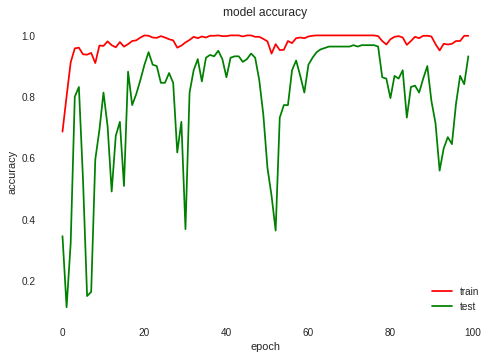

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

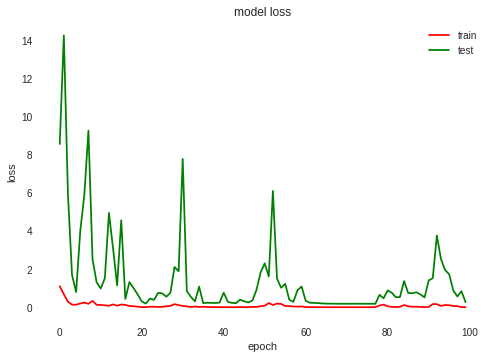

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
model.load_weights('/content/drive/My Drive/10_monkey_species/model_check_path_monkey_inception_resnet_v2.hdf5')

In [0]:
x_test = np.load('/content/drive/My Drive/10_monkey_species/x_test.npy')
y_test = np.load('/content/drive/My Drive/10_monkey_species/y_test.npy')
y_test = to_categorical(y_test, num_classes = 10)

In [0]:
from sklearn.metrics import classification_report
pred = model.predict(x_test)
print(classification_report(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       0.96      0.96      0.96        28
           2       1.00      1.00      1.00        27
           3       1.00      0.97      0.98        30
           4       0.96      0.96      0.96        26
           5       0.96      0.89      0.93        28
           6       0.96      1.00      0.98        26
           7       1.00      0.96      0.98        28
           8       1.00      1.00      1.00        27
           9       1.00      0.96      0.98        26

   micro avg       0.97      0.97      0.97       272
   macro avg       0.97      0.97      0.97       272
weighted avg       0.97      0.97      0.97       272



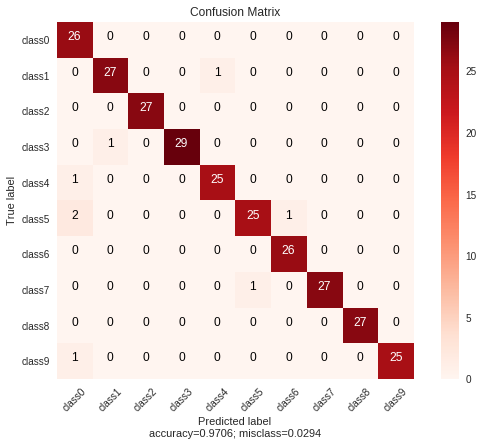

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['class0','class1','class2','class3','class4','class5','class6','class7','class8','class9'],
                      title        = "Confusion Matrix")

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
input_tensor = Input(shape=(299,299,3))
base_model =InceptionResNetV2(input_tensor = input_tensor, include_top = False, pooling = 'average',weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(10, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()